In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/omdena/

/content/gdrive/MyDrive/omdena


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('preprocessed_data.csv')

In [ ]:
df.head()

,date,State,Local_Government,Market_Name,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,season,Inflation
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,1KG,actual,Wholesale,NGN,175.92,1.5525,2002,January,Dry Season,12.876579
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,1KG,actual,Wholesale,NGN,150.18,1.3254,2002,January,Dry Season,12.876579
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),1KG,actual,Wholesale,NGN,358.70,3.1656,2002,January,Dry Season,12.876579
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,1KG,actual,Wholesale,NGN,155.61,1.3733,2002,January,Dry Season,12.876579
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),1KG,actual,Wholesale,NGN,196.87,1.7374,2002,January,Dry Season,12.876579


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64221 entries, 0 to 64220
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              64221 non-null  object 
 1   State             64221 non-null  object 
 2   Local_Government  64221 non-null  object 
 3   Market_Name       64221 non-null  object 
 4   latitude          64221 non-null  float64
 5   longitude         64221 non-null  float64
 6   category          64221 non-null  object 
 7   commodity         64221 non-null  object 
 8   unit              64221 non-null  object 
 9   priceflag         64221 non-null  object 
 10  pricetype         64221 non-null  object 
 11  currency          64221 non-null  object 
 12  price             64221 non-null  float64
 13  usdprice          64221 non-null  float64
 14  year              64221 non-null  int64  
 15  month             64221 non-null  object 
 16  season            64221 non-null  object

In [ ]:
len(df)

64221

# Distribution of records over category, commodity  and market

In [ ]:
def basic_bar_plot(df, x_col, y_col, title):
  plt.figure(figsize=(10, 6))
  sns.barplot(x=x_col, y=y_col, data=df)

  plt.xticks(rotation=90)

  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.title(title)

  plt.show()

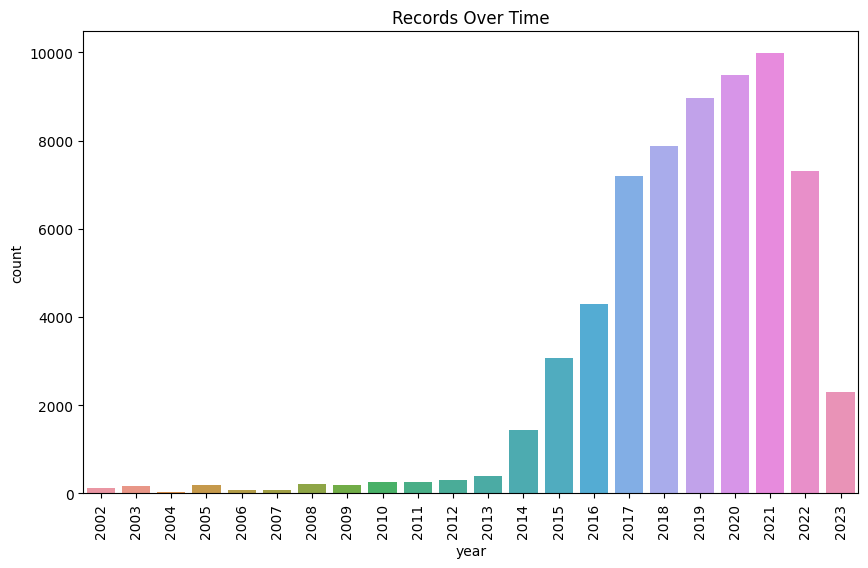

In [ ]:
record_count=df['year'].value_counts().reset_index()
record_count.columns = ['year', 'count']
record_count.sort_values(by='year', inplace=True)


basic_bar_plot(record_count, 'year', 'count', 'Records Over Time')

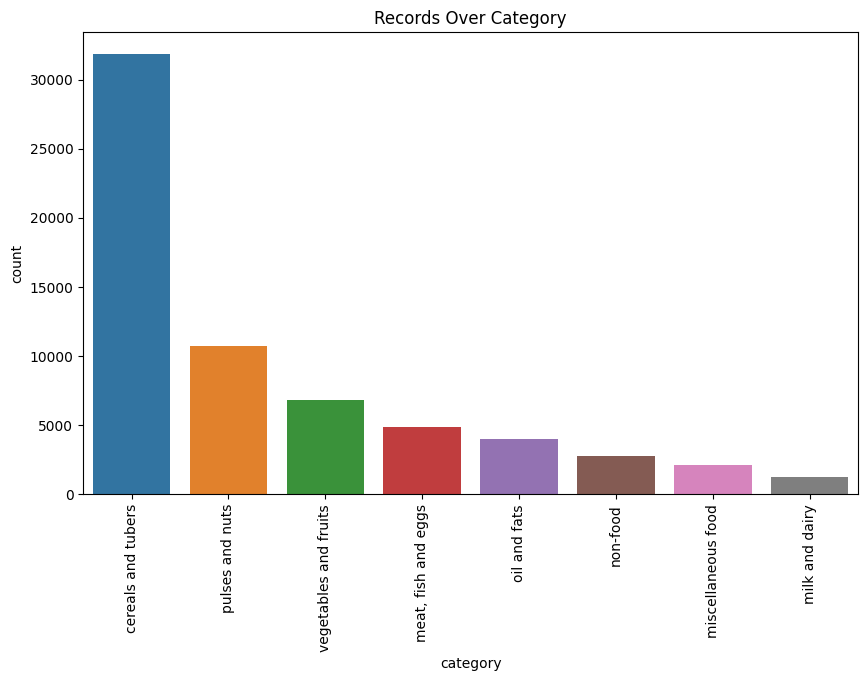

In [ ]:
#category wise distribution
category_count =  df['category'].value_counts().reset_index()
category_count.columns = ['category', 'count']

basic_bar_plot(category_count, 'category', 'count', 'Records Over Category')

In [ ]:
n_df['commodity'].unique()

array(['Maize', 'Rice', 'Sorghum', 'Millet', 'Bread', 'Cassava', 'Gari',
       'Yam', 'Fuel', 'Oil', 'Cowpeas', 'Groundnuts', 'Meat', 'Milk',
       'Beans', 'Onions', 'Fish', 'Eggs', 'Bananas', 'Oranges', 'Spinach',
       'Watermelons', 'Tomatoes', 'Salt', 'Sugar'], dtype=object)

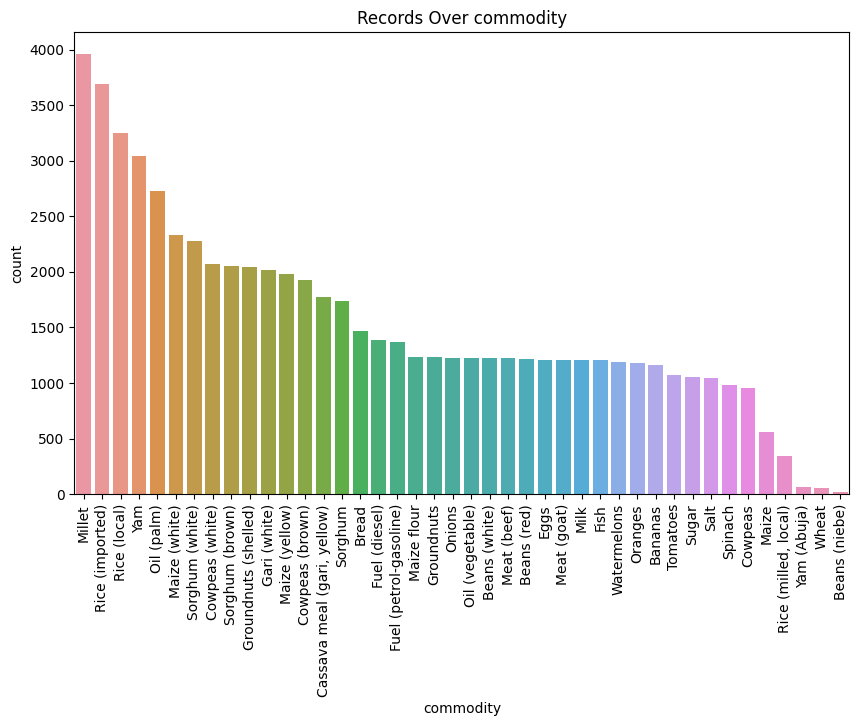

In [ ]:
#commodity wise distribution
commodity_count =  df['commodity'].value_counts().reset_index()
commodity_count.columns = ['commodity', 'count']

basic_bar_plot(commodity_count, 'commodity', 'count', 'Records Over commodity')

This shows the data is rich in records related to **Millet** price data points

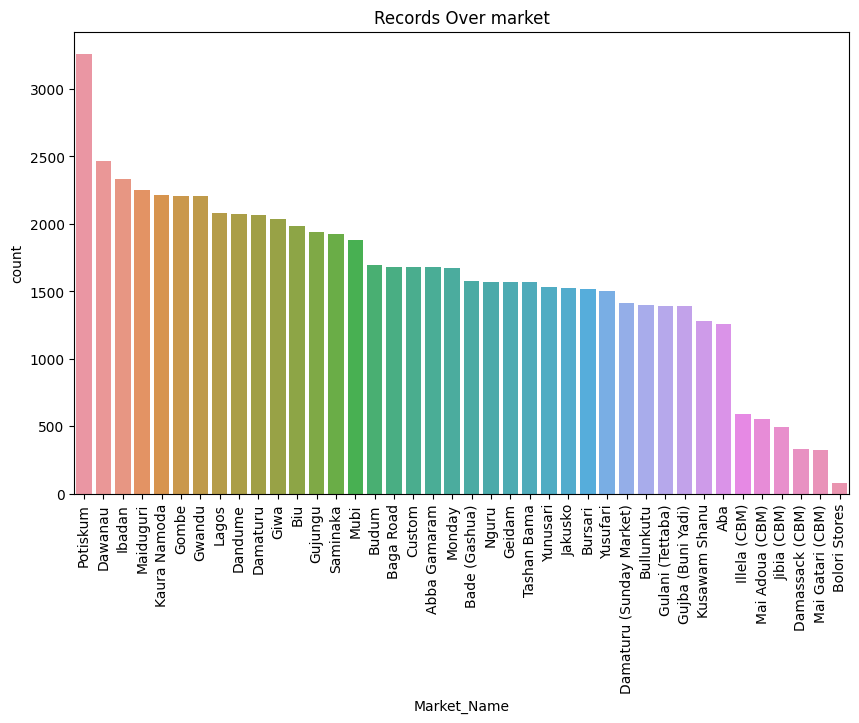

In [ ]:
#market wise distribution
market_count =  df['Market_Name'].value_counts().reset_index()
market_count.columns = ['Market_Name', 'count']

basic_bar_plot(market_count, 'Market_Name', 'count', 'Records Over market')

This showss **Potiskum**, **Dawanau** and **Ibadan** are the  markets with most data points.

## Geographical mapping of records

Better to do this in tableau

# How price fluctuates

*   for millets and rice over the years
*   in top 3 markets over the years
*   for oil(palm) and dieset



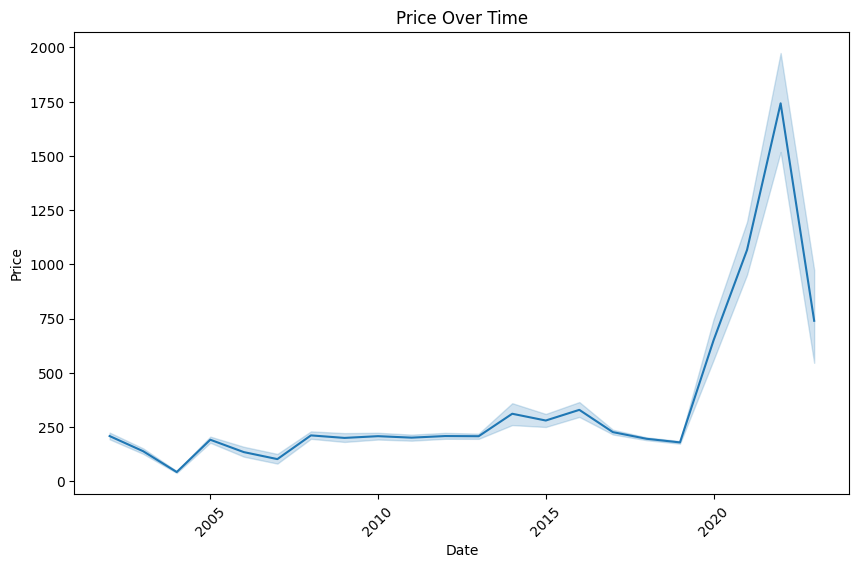

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size

sns.lineplot(x='year', y='price', data=df)

# Optional: Format date labels on x-axis
plt.xticks(rotation=45)

# Optional: Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')

plt.show()

In [ ]:
m_df = df[df['commodity']=='Millet']
r1_df = df[df['commodity']=='Rice (imported)']
r2_df = df[df['commodity']=='Rice (local)']
n_df = pd.concat([m_df, r1_df, r2_df])

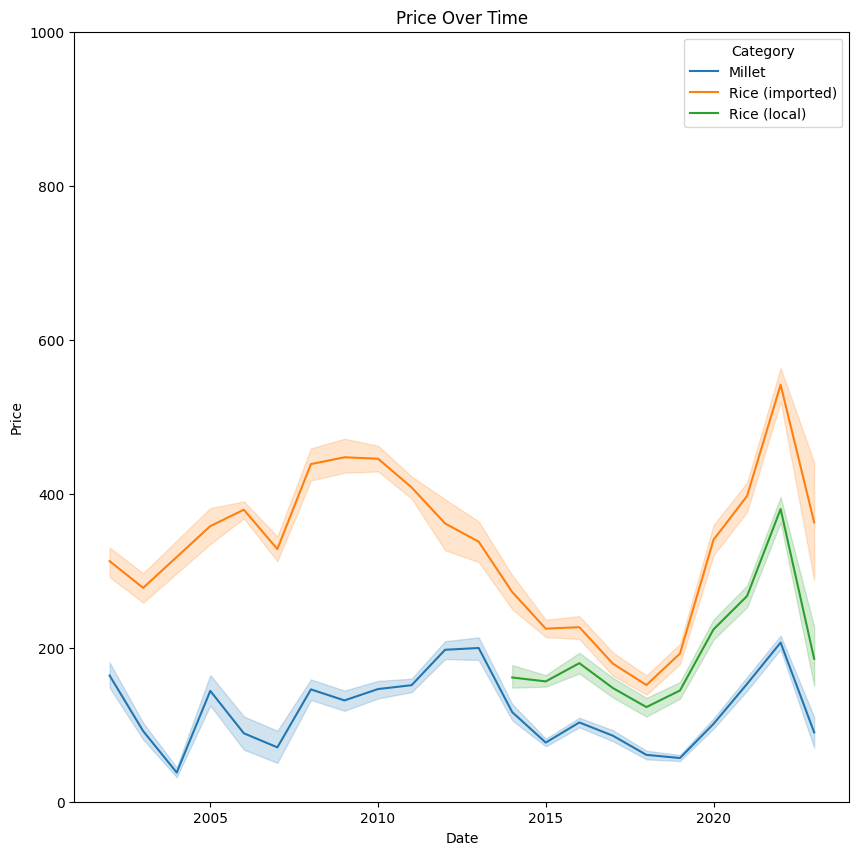

In [ ]:
plt.figure(figsize=(10, 10))  # Optional: set the figure size

sns.lineplot(x='year', y='price', data=n_df, hue='commodity')

# Optional: Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim(0, 1000)
plt.title('Price Over Time')
plt.legend(title='Category')

plt.show()

In [ ]:
o_df = df[df['commodity']=='Oil (palm)']
d_df = df[df['commodity']=='Fuel (diesel)']
n_df = pd.concat([o_df, d_df])

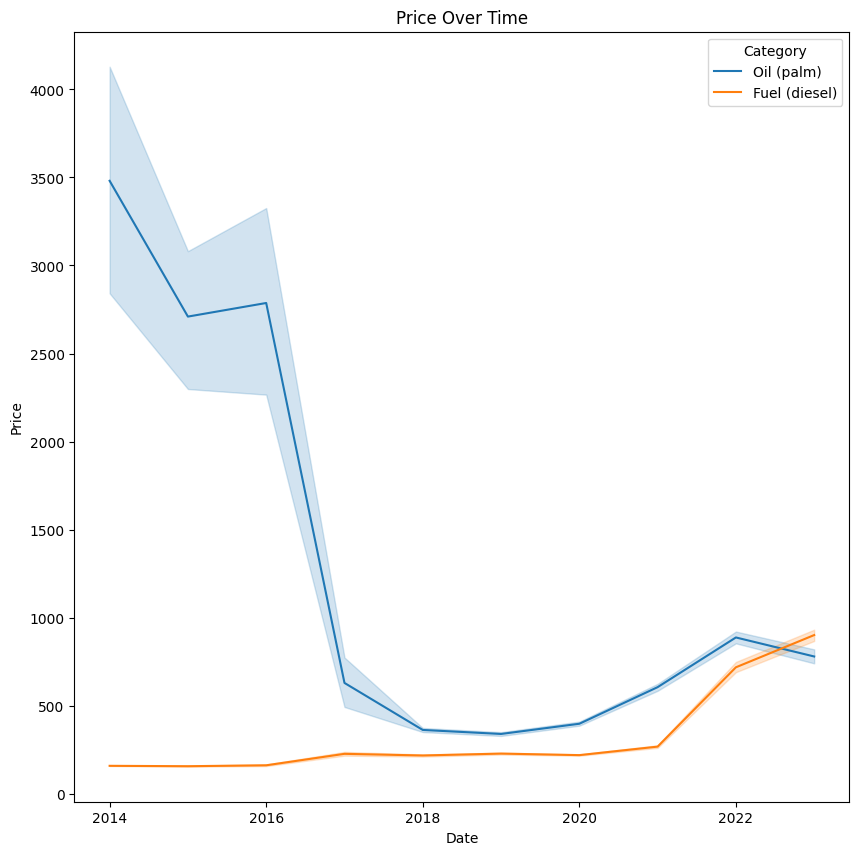

In [ ]:
plt.figure(figsize=(10, 10))  # Optional: set the figure size

sns.lineplot(x='year', y='price', data=n_df, hue='commodity')

# Optional: Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')
plt.legend(title='Category')

plt.show()

In [ ]:
df['Market_Name'].unique()

array(['Jibia (CBM)', 'Illela (CBM)', 'Mai Adoua (CBM)',
       'Damassack (CBM)', 'Dawanau', 'Mai Gatari (CBM)', 'Ibadan',
       'Maiduguri', 'Lagos', 'Giwa', 'Kaura Namoda', 'Aba', 'Gombe',
       'Gujungu', 'Saminaka', 'Dandume', 'Gwandu', 'Mubi', 'Biu',
       'Damaturu', 'Potiskum', 'Abba Gamaram', 'Baga Road', 'Bullunkutu',
       'Budum', 'Custom', 'Kusawam Shanu', 'Monday', 'Tashan Bama',
       'Bolori Stores', 'Damaturu (Sunday Market)', 'Geidam',
       'Gujba (Buni Yadi)', 'Jakusko', 'Bade (Gashua)', 'Nguru',
       'Yunusari', 'Yusufari', 'Bursari', 'Gulani (Tettaba)'],
      dtype=object)

In [ ]:
m1_df = df[df['Market_Name']=='Potiskum']
m2_df = df[df['Market_Name']=='Dawanau']
m3_df = df[df['Market_Name']=='Ibadan']
n_df = pd.concat([m1_df, m2_df, m3_df])

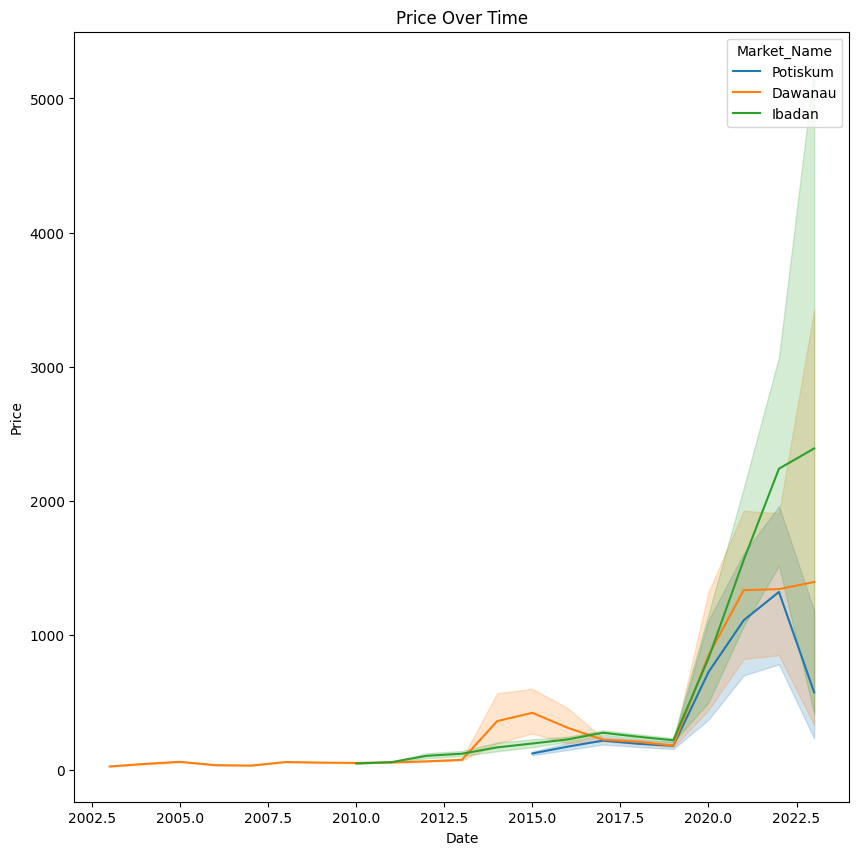

In [ ]:
plt.figure(figsize=(10, 10))

sns.lineplot(x='year', y='price', data=n_df, hue='Market_Name')

# Optional: Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time')

plt.show()